C:\Users\tsuchida\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[-1.3280, -1.8193]
[ 3.1249,  1.4599]
[ 3.6546, -1.2875]
[-2.2643,  3.2244]
[-3.1873, -1.5775]


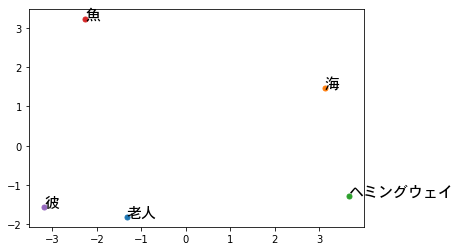

In [11]:
#AI-TECHGYM-1-12-A-2
#自然言語処理

#インポート
from gensim.models import word2vec
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

#PCA
from sklearn.decomposition import PCA

#フォントの準備
import urllib.request as req
url = "https://github.com/hokuto-HIRANO/Word2Vec/raw/master/font/Osaka.ttc"
req.urlretrieve(url, "./Osaka.ttc")

#フォントの指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#モデルの読み込み
model_path = './words.model'
model = word2vec.Word2Vec.load(model_path)

#対象の単語
words = []
words.append("老人")
words.append("海")
words.append("ヘミングウェイ")
words.append("魚")
words.append("彼")

vectors = []

for w in words:
    vectors.append(model.wv[w])

#単語のベクトル表現を2次元に圧縮する
pca = PCA(n_components=2)
pca.fit(vectors)
vectors_pca = pca.transform(vectors)

for w in vectors_pca:
    #配列形式に整形
    print(np.array2string(w, separator=', ', formatter={'float_kind': lambda x: '{: .4f}'.format(x)}))

#ブロットする
k = 0
while k < len(vectors_pca):
    #点プロット
    plt.plot(vectors_pca[k][0], vectors_pca[k][1], ms=5.0, zorder=2, marker="o")

    #文字プロット
    plt.annotate(words[k], (vectors_pca[k][0], vectors_pca[k][1]), fontproperties=prop, fontsize=15)

    k += 1

#グラフ表示
plt.show()


In [14]:
old = model.wv.most_similar(positive=['老人'], topn=5)
#old = model.wv.similar_by_vector('老人') 
#old = model.wv.similar_by_word('老人') 
for item in pro:
  print(item[0], item[1])

print()

sea = model.wv.most_similar(positive=['海'], topn=5)
for item in sea:
  print(item[0], item[1])

する 0.9980878829956055
よう 0.9979139566421509
ロープ 0.9977824687957764
彼 0.997760534286499
魚 0.9976662397384644

ロープ 0.9983007907867432
する 0.9980823993682861
船 0.9979177117347717
いる 0.9977597594261169
魚 0.9976441860198975


In [9]:
#Word2Vec
from gensim.models import Word2Vec

#モデル
model = Word2Vec(word_list, min_count=1)
vector = model.wv['老人']

print(vector)

pro = model.wv.most_similar(positive=['老人'], topn=5)
#pro = model.wv.similar_by_vector('プログラミング') 
#pro = model.wv.similar_by_word('プログラミング') 
for item in pro:
    print(item[0], item[1])

[-0.01597747 -0.07197819  0.05145754 -0.00362651 -0.05785058 -0.06375936
  0.0687388   0.07373976  0.10660839  0.06858838  0.04622833 -0.02503598
  0.01004511  0.06323667 -0.04971182  0.11643942  0.05509336  0.00970035
  0.05378618  0.04831289 -0.00997283  0.01753249  0.01398721 -0.05840924
  0.00500582  0.0556059   0.03506973 -0.05495626 -0.04981653 -0.10574924
 -0.01675132 -0.07553081 -0.04409749  0.04958062  0.04105351  0.05156162
 -0.01398178  0.12140919  0.00330613 -0.0042523   0.03092846  0.03102338
  0.07848403 -0.00197029  0.01726232 -0.0409776   0.00295002 -0.02116165
 -0.05198758  0.02792369 -0.09529288  0.01263538  0.10742967  0.06113813
  0.01715404  0.00233667 -0.1373577  -0.03856918 -0.02026626  0.09201654
  0.07473162 -0.08599371  0.03033423  0.00912722 -0.02067043  0.0207465
  0.03591751 -0.02837273  0.00927966  0.09845412 -0.01935963 -0.09998393
  0.05706836  0.08168416 -0.07492607 -0.09251877 -0.00940691  0.02282015
 -0.05639417 -0.10887287  0.04944274 -0.05515872 -0.